In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

# import Kmeans from sklearn
from sklearn.cluster import KMeans

#Scalar
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

In [4]:
df_savings = pd.read_csv(r'C:\Users\Dimitri Salavaci\Downloads\mini-project-III\twm_savings_acct.csv', sep=';')
df_credit = pd.read_csv(r'C:\Users\Dimitri Salavaci\Downloads\mini-project-III\twm_credit_acct.csv', sep=';')
df_tran = pd.read_csv(r'C:\Users\Dimitri Salavaci\Downloads\mini-project-III\twm_transactions.csv', sep=';')
df_accts = pd.read_csv(r'C:\Users\Dimitri Salavaci\Downloads\mini-project-III\twm_accounts.csv', sep=';')

In [5]:
df_savings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [6]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [7]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


In [8]:
df_savings

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [9]:
df_credit

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [10]:
df_tran

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [11]:
#calculate total savings from savings account and total debt from credit account for each
#customer. Total savings = (ending balance - starting balance) for savings accoount. 
#Total debt = (credit limit - ending balance) for credit account.

#make copy of accounts dataset for calculations.
df_accts_calc = df_accts.copy()

#add credit limit information from credit account to primary accounts dataset for calculation of credit debt.
df_accts_calc = pd.merge(df_accts_calc,df_credit[['acct_nbr','credit_limit']],on='acct_nbr', how='left')

#calculate total savings and total debt for each customer as per the formulae outlined before.
df_accts_calc['total_savings'] = np.where(df_accts_calc.acct_type.str.strip()=='SV',
                                    df_accts_calc['ending_balance'] - df_accts_calc['starting_balance'], np.NaN)
df_accts_calc['total_debt'] = np.where(df_accts_calc.acct_type.str.strip()=='CC',
                                    df_accts_calc['credit_limit'] - df_accts_calc['ending_balance'], np.NaN)

#Drop other description columns and keep customer id along with total savings and total_debt. 
df_accts_calc = df_accts_calc[['cust_id','total_savings','total_debt']]
df_accts_summary = df_accts_calc.groupby(['cust_id']).sum().reset_index()

#verify total number of rows in the processed accounts dataset
df_accts_summary

,cust_id,total_savings,total_debt
0,1362480,480.88,2480.00
1,1362484,1927.41,2630.28
2,1362485,0.00,0.00
3,1362486,-168.24,0.00
4,1362487,-638.84,1451.77
...,...,...,...
660,1363490,34.24,0.00
661,1363491,-187.63,0.00
662,1363492,163.72,231.00
663,1363493,222.43,1500.00


In [12]:
#calculate total number of small and big transactions for each customer. use $500 as criteria
#for demarcation of small and big transactions.

#fetch transaction amounts for all customers and their associated accounts. 

df_tran_calc = pd.merge(df_accts, df_tran[['acct_nbr','tran_amt']],on='acct_nbr', how='left') 
df_tran_calc = df_tran_calc[['acct_nbr','cust_id','tran_amt']]


#calculate number of small transactions (less than $500) for each customer and associated accounts.
df_small_trans_count = df_tran_calc.groupby(['acct_nbr','cust_id'])['tran_amt'].apply(
                            lambda x: (x <= 500.00).sum()).reset_index(name='small_trans_count_checking')

#calculate number of big transactions (more than $500) for each customer and associated accounts.
df_big_trans_count = df_tran_calc.groupby(['acct_nbr','cust_id'])['tran_amt'].apply(
                            lambda x: (x > 500.00).sum()).reset_index(name='big_trans_count_checking')

#consolidate all big and small transactions for each customer.
df_trans_summary = pd.merge(df_small_trans_count,
                df_big_trans_count[['acct_nbr', 'cust_id', 'big_trans_count_checking']],
                                    on=['acct_nbr', 'cust_id'], how='left')

df_trans_summary.drop(columns=['acct_nbr'], inplace=True)

df_trans_summary = df_trans_summary.groupby(['cust_id']).sum().reset_index()

#verify total number of rows in the processed transaction counts dataset
df_trans_summary

,cust_id,small_trans_count_checking,big_trans_count_checking
0,1362480,151,6
1,1362484,180,7
2,1362485,163,8
3,1362486,50,0
4,1362487,100,3
...,...,...,...
660,1363490,12,0
661,1363491,17,1
662,1363492,135,18
663,1363493,116,2


In [13]:
#merge both accounts and transaction summary to create the final bank behavior dataset for each customer 
#for clustering.

df_bank_behavior = pd.merge(df_accts_summary, df_trans_summary, on='cust_id', how='left')

#verify total number of rows in the processed dataset
df_bank_behavior

,cust_id,total_savings,total_debt,small_trans_count_checking,big_trans_count_checking
0,1362480,480.88,2480.00,151,6
1,1362484,1927.41,2630.28,180,7
2,1362485,0.00,0.00,163,8
3,1362486,-168.24,0.00,50,0
4,1362487,-638.84,1451.77,100,3
...,...,...,...,...,...
660,1363490,34.24,0.00,12,0
661,1363491,-187.63,0.00,17,1
662,1363492,163.72,231.00,135,18
663,1363493,222.43,1500.00,116,2


In [14]:
# Start clustering process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_behavior_sc = scaler.fit_transform(df_bank_behavior)

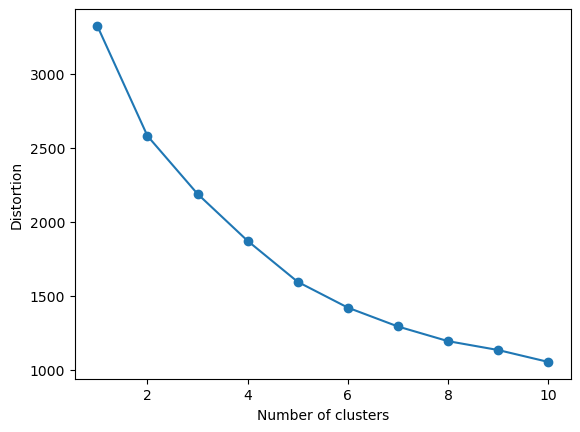

In [15]:
# Plotting Elbow Curve
def plot_distortion_2(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    
# elbow rule
plot_distortion_2(bank_behavior_sc, max_clusters=10)

In [16]:
# KMeans of dataset
kmeans= KMeans(n_clusters=4, random_state=0)
kmeans.fit(bank_behavior_sc)
k_labels = kmeans.labels_
new_columns = kmeans.predict(bank_behavior_sc)
clusters = pd.DataFrame(new_columns)

In [17]:
# MinMax Scalar to bring all data onto relative 0-5 scale

minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(df_bank_behavior)
bank_behavior_minmax = pd.DataFrame(minmax_df,columns=df_bank_behavior.columns.to_list())

In [33]:
# Combine the cluster identifiers with minmax scaled bank behaviour df
bank_behaviour_df = pd.concat([bank_behavior_minmax, clusters], axis=1)
bank_behaviour_df.rename(columns={0:'cluster'}, inplace=True)
bank_behaviour_df

,cust_id,total_savings,total_debt,small_trans_count_checking,big_trans_count_checking,cluster
0,0.000000,1.070415,0.716763,2.996032,0.93750,3
1,0.019704,1.606719,0.760197,3.571429,1.09375,3
2,0.024631,0.892128,0.000000,3.234127,1.25000,3
3,0.029557,0.829753,0.000000,0.992063,0.00000,0
4,0.034483,0.655277,0.419587,1.984127,0.46875,0
...,...,...,...,...,...,...
660,4.975369,0.904823,0.000000,0.238095,0.00000,1
661,4.980296,0.822564,0.000000,0.337302,0.15625,1
662,4.985222,0.952828,0.066763,2.678571,2.81250,3
663,4.990148,0.974595,0.433526,2.301587,0.31250,1


In [19]:
# Genrating radar DF with the mean of each cluster's feature relative to mean of the feature
radar_df = bank_behaviour_df.groupby('cluster').mean().divide(bank_behaviour_df.drop('cluster',axis=1).mean())
radar_df = bank_behaviour_df.groupby('cluster').mean()

In [20]:
categories = radar_df.columns.to_list()
fig = go.Figure()

i=0
for index, series in radar_df.iterrows():
    r = []
    r.append(series.values)
    
    fig.add_trace(go.Scatterpolar(
        r=r[0],
        theta=categories,
        fill='toself',
        name=f'Cluster {i}'))
    i+=1

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True)

fig.show()

In [21]:
# Scatter plot of PCA

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.title('Clustering by KMeans - Banking Behaviour')
    plt.grid()
    plt.show()

In [38]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(bank_behavior_sc) 
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal_component_1', 'principal_component_2'])

In [39]:
finalDf = pd.concat([principalDf, bank_behaviour_df[['cluster']]], axis = 1)
finalDf

,principal_component_1,principal_component_2,cluster
0,1.052824,1.582168,3
1,2.012871,1.227455,3
2,0.617240,1.165175,3
3,-1.530225,1.746395,0
4,-0.480201,1.815419,0
...,...,...,...
660,-1.898802,-1.188977,1
661,-1.800227,-1.184324,1
662,1.737845,-1.822833,3
663,-0.252667,-1.468627,1


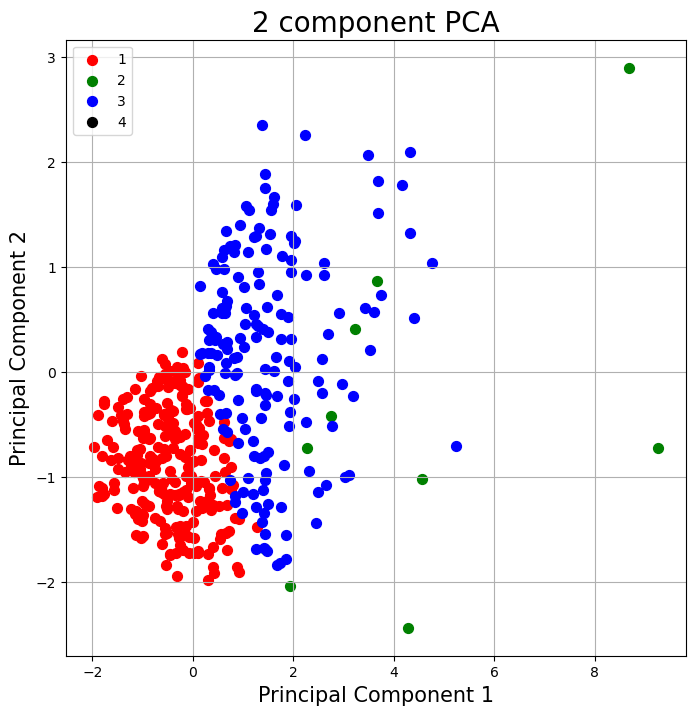

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

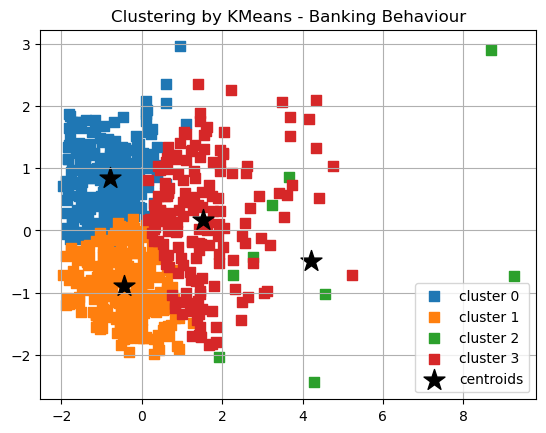

In [30]:


plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

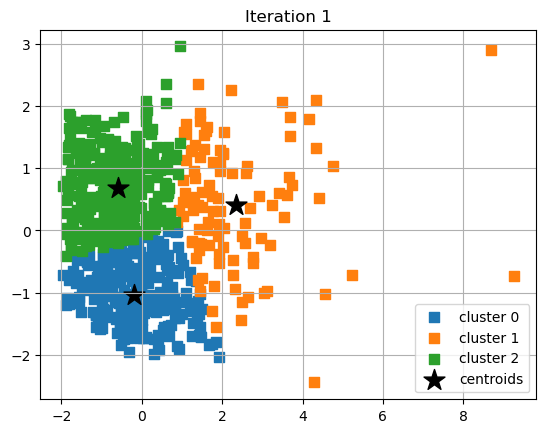

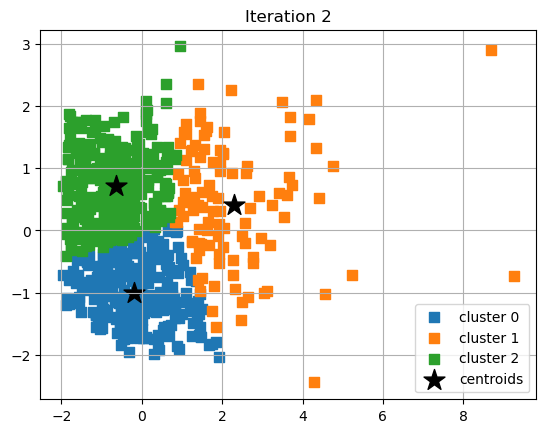

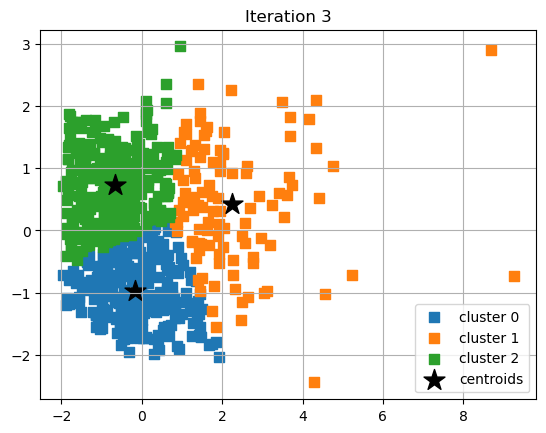

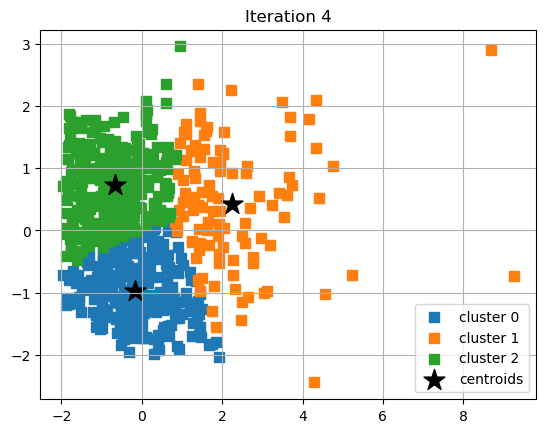

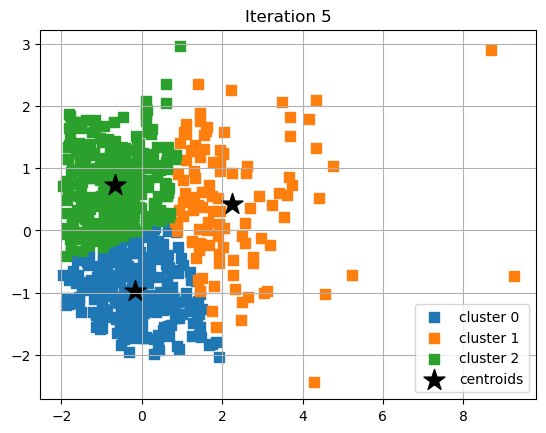

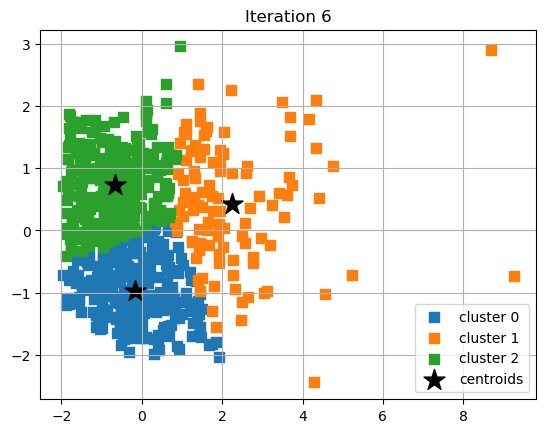

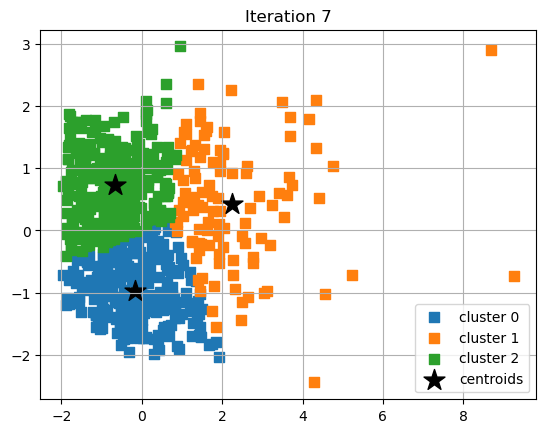

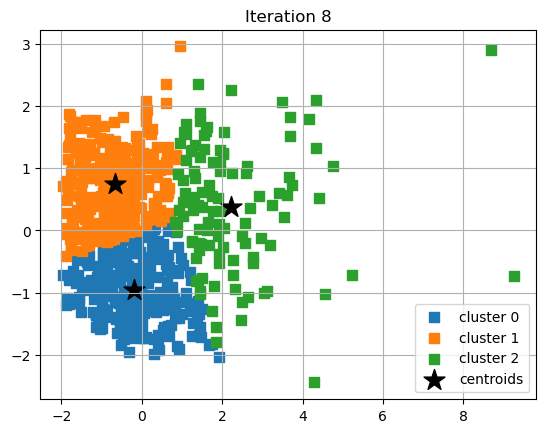

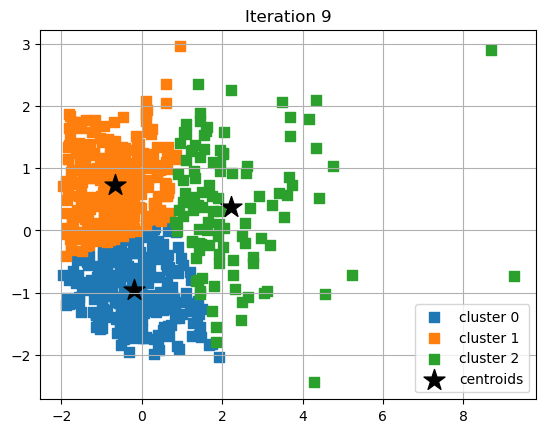

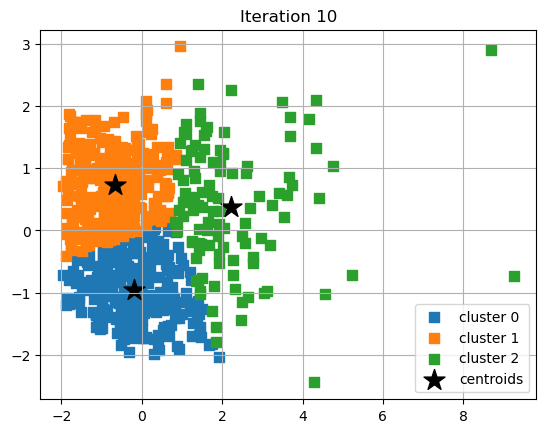

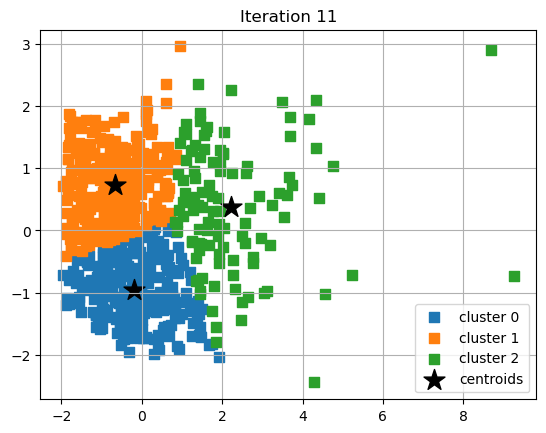

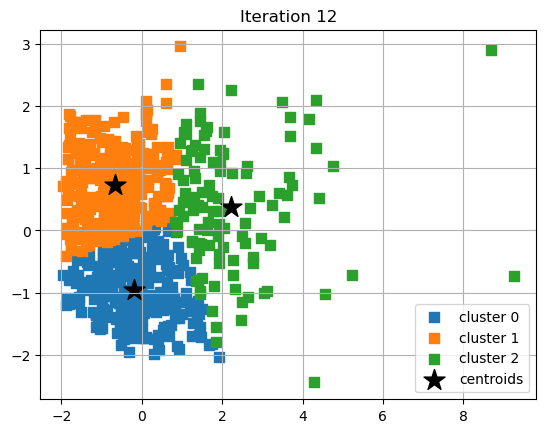

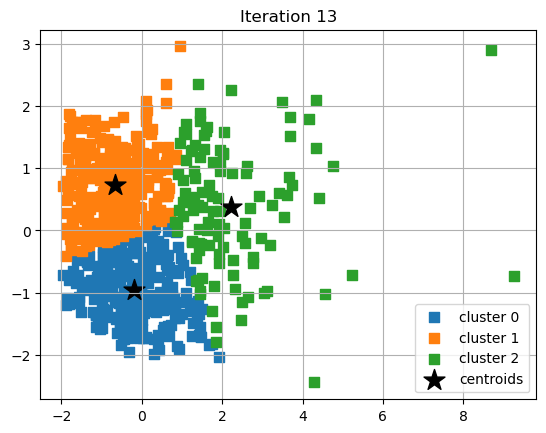

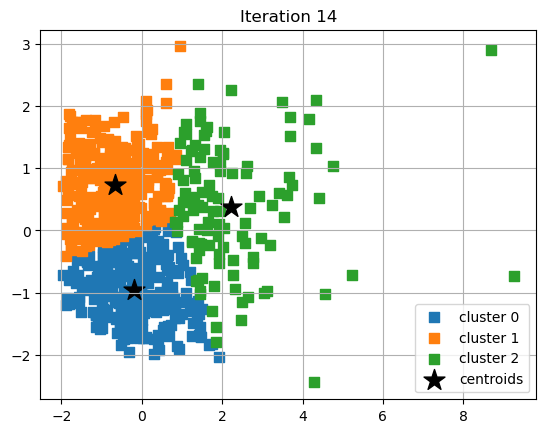

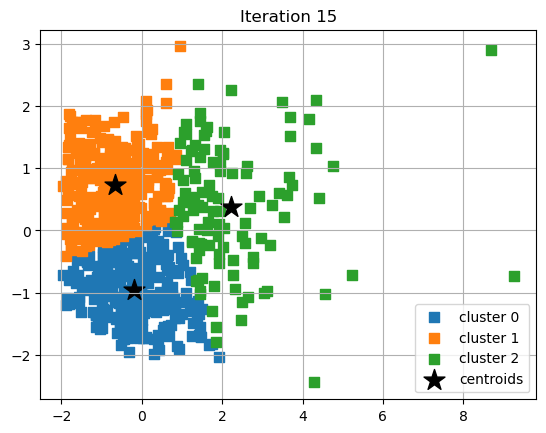

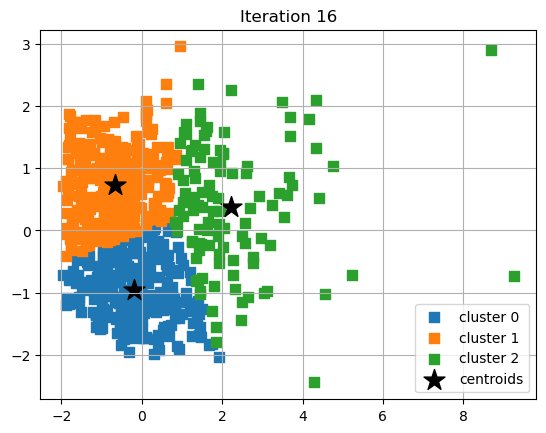

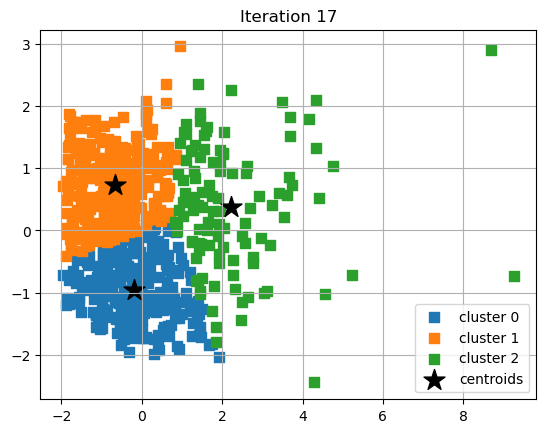

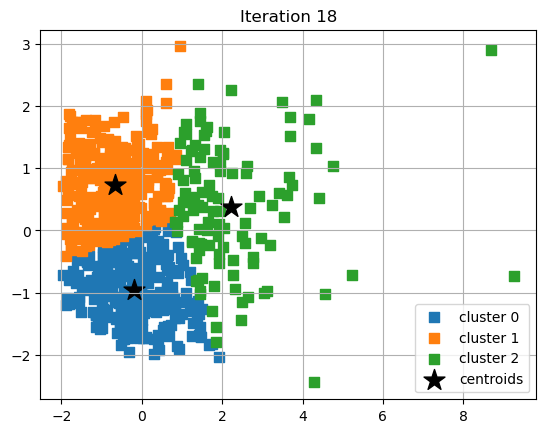

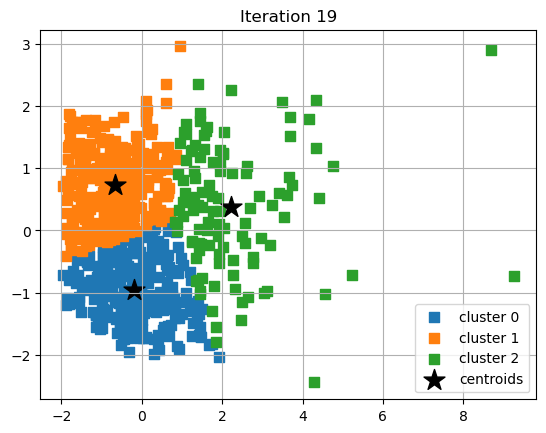

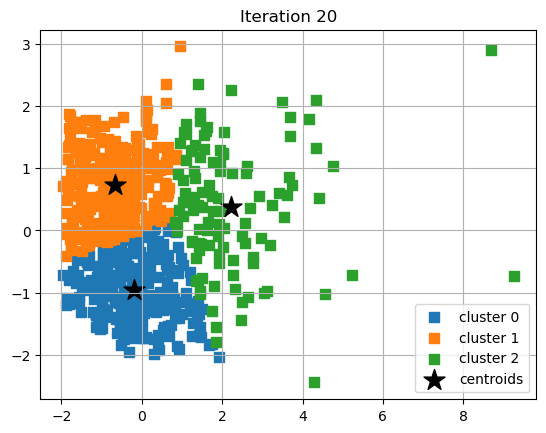

In [24]:
# Iteration of KMeans

for i in range(1,21):
    temp = KMeans(n_clusters=3, max_iter=i, random_state=42).fit(X_pca)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = X_pca[clust_label == cluster, 0]
        y = X_pca[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
    plt.grid()
    plt.title(f'Iteration {i}')
    plt.show()